In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the processed titanic dataframe.

Store it in a dataframe called `titanic_train` and `titanic_test`.

In [2]:
titanic_test=pd.read_csv('../week7-IntroMachineLearning/data/titanic_test.csv')

In [3]:
titanic_train=pd.read_csv('../week7-IntroMachineLearning/data/titanic_train.csv')

# Train and Test

You have separated the original dataset into train and test. In fact, what you were effectively doing was hiding some part of your data to analyse your scores afterwards.

# First Step: start simple

You will select two variables to create the predictive variables for your problem - store the features representing the `Sex` and `Age` in dataframes called `X_train` and `X_test`. (maybe the `sex` variable is written as `Sex_male` for example, if you dummyfied it)

Also store the variable `Survived` into pandas series called `y_train` and `y_test`. This is your target variable. 

In [4]:
X_train=titanic_train[['Age','Female']]
X_test=titanic_test[['Age','Female']]
y_train=titanic_train[['Survived']]
y_test=titanic_test[['Survived']]

# Logistic regression for classification

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Use the LogisticRegression classifier to train your model on your train set.

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
model= LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Use your logistic regression model to generate a prediction for your test dataset. 

Create a variable called `y_pred` to put the results of the model. Try to understand what exactly the `.predict()` method is doing. 

In [7]:
y_pred=model.predict(X_test)

In [8]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0], dtype=int64)

## Evaluating the results

Use your model's method called `score` to evaluate the results on your test set. 

In [9]:
model.score(X_train,y_train)

0.7902621722846442

In [10]:
model.score(X_test,y_test)

0.7471910112359551

## To think:

- What does the `.score()` method calculates?
- Is this metric appropriate for this use case? Why?

In [11]:
titanic_test['Survived'].mean()

0.4438202247191011

Not exactly, it means that we are getting a right prediction 75% of the time. But if we would guess that no one survived. Then, we would have guessed right 55% of the time

## Confusion matrix

Print the confusion matrix for the results obtained.

_hint: You can use the `pd.crosstab()` or the_ `sklearn.metrics.confusion_matrix` _method_ 

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_test,y_pred)

array([[82, 17],
       [28, 51]], dtype=int64)

## Precision-recall scores

## Calculate the precision and recall scores for the test set. 

_hint: Use the methods from sklearn.metrics_ 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [15]:
precision_score(y_test,y_pred)

0.75

In [16]:
recall_score(y_test,y_pred)

0.6455696202531646

## Compare a measure of accuracy, recall and precision for both train and test sets. 

In [17]:
y_pred_train=model.predict(X_train)

In [18]:
model.score(X_train,y_train)

0.7902621722846442

In [19]:
precision_score(y_train,y_pred_train)

0.7539267015706806

In [20]:
recall_score(y_train,y_pred_train)

0.6889952153110048

# Non-linear Models - Trees

## Create a decision tree model using the default arguments.

In [22]:
from sklearn.tree import DecisionTreeClassifier
treedefault=DecisionTreeClassifier()

In [23]:
treedefault.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
y_train_predict_tree=treedefault.predict(X_train)

In [27]:
y_test_predict_tree=treedefault.predict(X_test)

## Calculate the accuracy, precision and recall scores for both the `training set` and the `test set`.

After calculating it, compare the results. What do you observe? Do you understand what does that mean?

In [28]:
accuracy_score(y_train, y_train_predict_tree)

0.846441947565543

In [29]:
accuracy_score(y_test, y_test_predict_tree)

0.6966292134831461

In [31]:
precision_score(y_train, y_train_predict_tree)

0.8469945355191257

In [34]:
precision_score(y_test, y_test_predict_tree)

0.6984126984126984

In [35]:
recall_score(y_train, y_train_predict_tree)

0.7416267942583732

In [33]:
recall_score(y_test, y_test_predict_tree)

0.5569620253164557

## Plotting trees

Use the the method `plot_tree()` from `sklearn.tree` module to print the tree on your notebook. Play with arguments like `feature_names`, `class_names`, `proportion`, `filled`...

In [36]:
from sklearn.tree import plot_tree

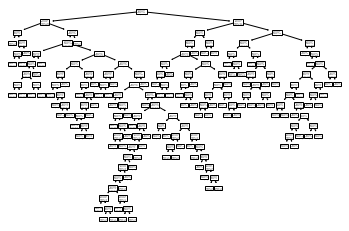

In [43]:
fig, ax = plt.subplots()
plot_tree(treedefault, feature_names=X_train.columns);

What do you think happened? Did you expect the resulting tree to have that size?

Yes, because the default parameters of the DecisionTreeClassifier allows the tree to grow

## Using the `mlxtend.plotting` module, plot the decision boundaries for the Tree classification algorithm.

Use `!pip install mlxtend --user` to install the `mlxtend` package


_hint: you have to convert the dataframes to np.array before plotting in this package_

Note: Include the labels on the plot using: 

`plt.xlabel(x_test.columns[0])`

`plt.ylabel(x_test.columns[1]);`

where x_test is your dataframe.

In [48]:
from mlxtend.plotting import plot_decision_regions

In [59]:
np.array(y_test).reshape((178,))

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0], dtype=int64)

Text(0, 0.5, 'Female')

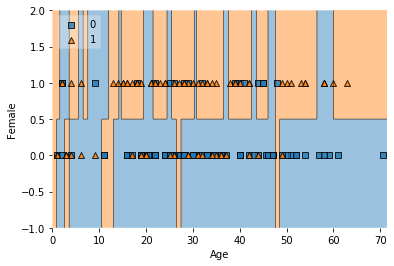

In [62]:
plot_decision_regions(np.array(X_test), np.array(y_test).reshape((178,)), clf=treedefault, legend=2)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

## Perform the same operation (i.e., use the `mlxtend.plotting` module to plot the decision boundary) for the Logistic Regression model you've created above.

Text(0, 0.5, 'Female')

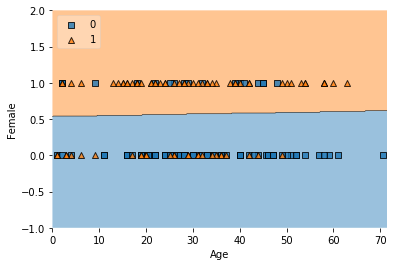

In [63]:
plot_decision_regions(np.array(X_test), np.array(y_test).reshape((178,)), clf=model, legend=2)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

# Fixing the Decision Tree algorithm

As you observed, an overfit occurred when using the default values of the DecisionTreeClassifier. This happens because, by default, the Decision Tree is so complex that it manages to memorize the whole dataset despite the granularity necessary to do that. It just keeps creating splits until each observation is memorized. 

In this sense, by default, the Decision Tree algorithm is **too complex**. We will solve this problem by making the tree a bit less complex. We'll change the parameter called `max_depth` for the DecisionTreeClassifier().

Try to find a good value for `max_depth` that helps getting closer results within `train` and `test` scores.

In [105]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train,y_train)
accuracy_score(y_train,tree.predict(X_train))

0.8014981273408239

In [106]:
accuracy_score(y_test,tree.predict(X_test))

0.7584269662921348

In [107]:
precision_score(y_train,tree.predict(X_train))

0.7536945812807881

In [108]:
precision_score(y_test,tree.predict(X_test))

0.7432432432432432

In [109]:
recall_score(y_train,tree.predict(X_train))

0.7320574162679426

In [110]:
recall_score(y_test,tree.predict(X_test))

0.6962025316455697

## Plot the resulting tree and deicision boundary. 

After choosing a good value for `max_depth`, i.e., a value that manages to get a good balance within performance and generalization

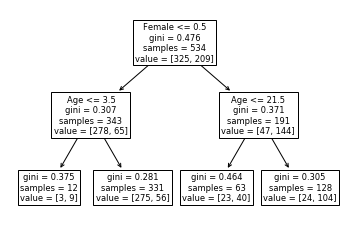

In [111]:
fig, ax = plt.subplots()
plot_tree(tree, feature_names=X_train.columns);

Text(0, 0.5, 'Female')

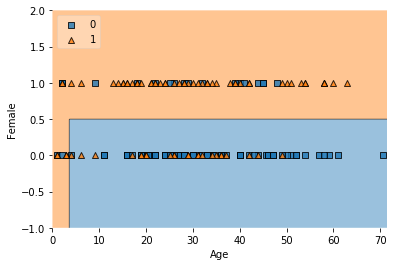

In [112]:
plot_decision_regions(np.array(X_test), np.array(y_test).reshape((178,)), clf=tree, legend=2)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

# Finally, use more variables

Try to obtain a good score for your problem. Use more variables if you wish. You can plot the tree to understand the variables.

In [119]:
X_train_2=titanic_train[['Female','Age','Fare','Pclass']]
X_test_2=titanic_test[['Female','Age','Fare','Pclass']]

In [143]:
tree2=DecisionTreeClassifier(max_depth=3)

In [144]:
tree2.fit(X_train_2,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [145]:
accuracy_score(y_train,tree2.predict(X_train_2))

0.8277153558052435

In [146]:
accuracy_score(y_test,tree2.predict(X_test_2))

0.7191011235955056

In [147]:
precision_score(y_train,tree2.predict(X_train_2))

0.7447698744769874

In [148]:
precision_score(y_test,tree2.predict(X_test_2))

0.6666666666666666

In [149]:
recall_score(y_train,tree2.predict(X_train_2))

0.8516746411483254

In [150]:
recall_score(y_test,tree2.predict(X_test_2))

0.7341772151898734

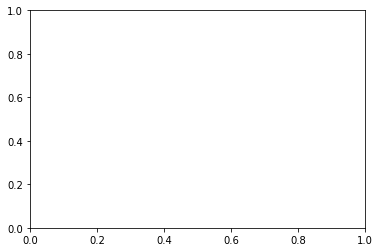

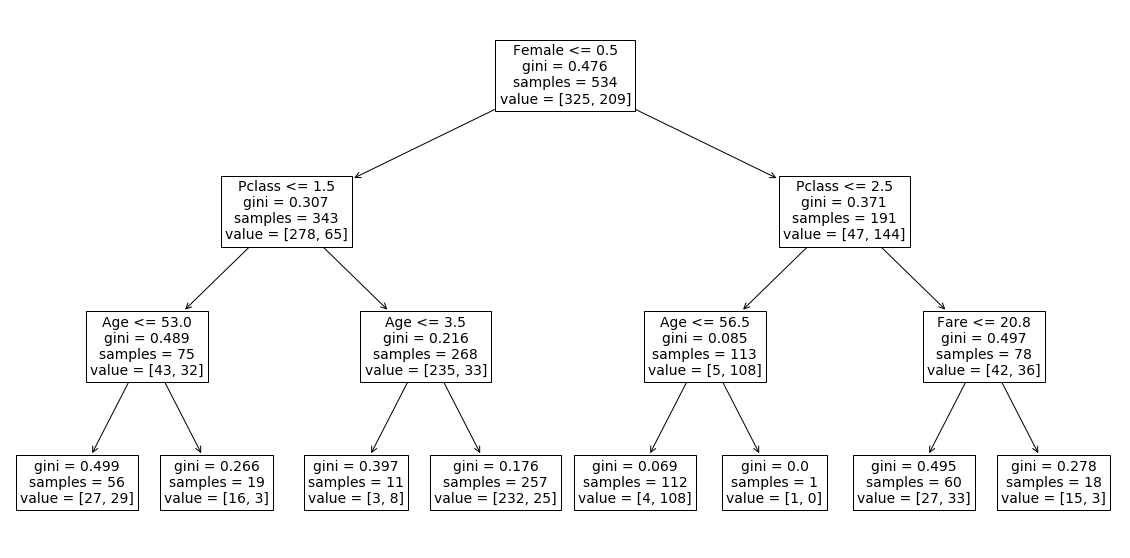

In [152]:
fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
plot_tree(tree2, feature_names=X_train_2.columns);